# Splitting Train and Test into csv

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('abalone.csv')
df.head(1)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15


In [2]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.iloc[:,:7],df.iloc[:,-1],random_state=42,test_size=0.3)

In [3]:

xtrain['Rings'] = ytrain
xtest['Rings'] = ytest

csv_file_path1 = 'abalone_test.csv'
csv_file_path2 = 'abalone_train.csv'

xtest.to_csv(csv_file_path1, index=False)
xtrain.to_csv(csv_file_path2, index=False)

# Regression Problem/ Pearson Relation

In [4]:
train = pd.read_csv('abalone_train.csv')

In [5]:
def pearson_corr(x, y):
    
    x_mean = x.mean()
    y_mean = y.mean()
    
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sqrt(np.sum((x - x_mean) ** 2) * np.sum((y - y_mean) ** 2))
    return numerator / denominator

numerical_cols = train.columns
correlation_matrix = pd.DataFrame(index=numerical_cols, columns=numerical_cols)

for col1 in numerical_cols:
    for col2 in numerical_cols:
        correlation_matrix.loc[col1, col2] = pearson_corr(train[col1], train[col2])

print(correlation_matrix)

                  Length  Diameter    Height Whole weight Shucked weight  \
Length               1.0  0.987237  0.810902     0.927082       0.900977   
Diameter        0.987237       1.0  0.816231     0.926894       0.895989   
Height          0.810902  0.816231       1.0     0.802773       0.759938   
Whole weight    0.927082  0.926894  0.802773          1.0       0.970669   
Shucked weight  0.900977  0.895989  0.759938     0.970669            1.0   
Viscera weight  0.905628  0.902901  0.783834     0.966415       0.933525   
Shell weight    0.896718  0.903129  0.797269      0.95604       0.882998   
Rings           0.549896  0.566131  0.543747     0.534815        0.41391   

               Viscera weight Shell weight     Rings  
Length               0.905628     0.896718  0.549896  
Diameter             0.902901     0.903129  0.566131  
Height               0.783834     0.797269  0.543747  
Whole weight         0.966415      0.95604  0.534815  
Shucked weight       0.933525     0.8829

In [6]:
best_col = None
max_corr = 0
for i in train.drop(columns=['Rings']).columns:
    corr = pearson_corr(train[i],train['Rings'])
    if(corr > max_corr):
        best_col = i
        max_corr = corr
print(f"Column that has highest Pearson Correlation with Target : {best_col}")

Column that has highest Pearson Correlation with Target : Shell weight


In [7]:
X = train[best_col]
y = train['Rings']
print(y)

0        9
1        7
2       11
3        7
4       13
        ..
2918     9
2919    12
2920    11
2921     9
2922     6
Name: Rings, Length: 2923, dtype: int64


In [8]:
class LR_model():
    def __init__(self):
        self.m = None
        self.b = None

    def fit(self,X,y):
        self.m = np.dot(X - np.mean(X),(y-np.mean(y)).T)/sum(pow(X - np.mean(X),2))
        self.b = np.mean(y) - np.mean(X)*self.m

        print(f"m = {self.m}, b = {self.b}")

    def predict(self,xtest):
        return self.m * xtest + self.b

In [9]:
lr = LR_model()
lr.fit(X,y)          
ypred_train = lr.predict(X)


m = 14.401800271637446, b = 6.508970204283253


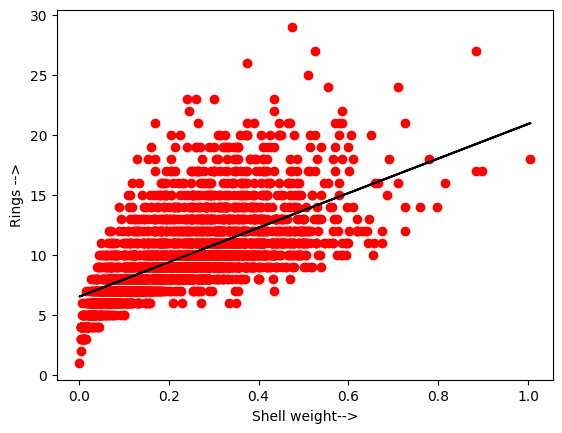

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X,y,c='red')
plt.xlabel(best_col + "-->")
plt.ylabel("Rings -->")
plt.plot(X,ypred_train,c='black')   

MSE

In [11]:
def RMSE(a,b):
    sum_error_sq = pow((np.sum(pow(a-b,2))/len(a)) , 0.5)
    return sum_error_sq
RMSE(y,ypred_train)

np.float64(2.527846339134725)

 Data

In [12]:
test = pd.read_csv('abalone_test.csv')
X_test = test[best_col]
y_test = test['Rings']

ypred_test = lr.predict(X_test)

In [13]:
RMSE(y_test,ypred_test)

np.float64(2.467940147010543)

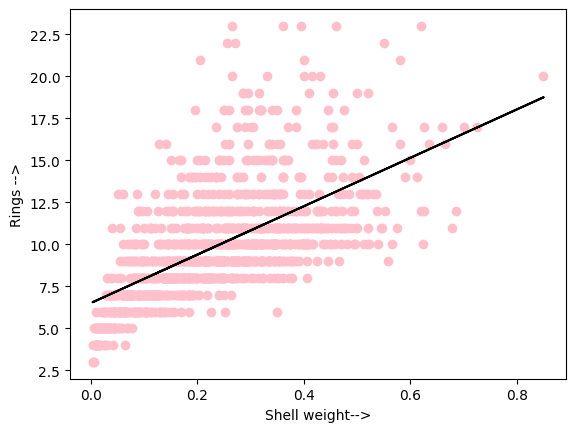

In [14]:
plt.scatter(X_test,y_test,c='pink')
plt.xlabel(best_col + "-->")
plt.ylabel("Rings -->")
plt.plot(X_test,ypred_test,c='black')

Scatter plot of Ypred vs Yactual for test

Text(0, 0.5, 'Predicted Test target')

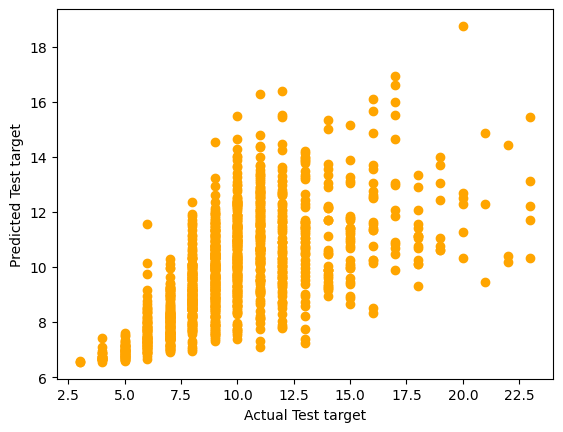

In [15]:
plt.scatter(y_test,ypred_test,c='orange')
plt.xlabel('Actual Test target')
plt.ylabel('Predicted Test target')

Polynomial Regression

In [16]:
def trf_X(x,deg):
    x = np.array(x).reshape(1,len(x))
    for i in range(2,deg+1):
        x = np.insert(x,x.shape[0],pow(x[0,:],i),axis = 0)
    return x  

print(trf_X([1,2],3))

[[1 2]
 [1 4]
 [1 8]]


In [17]:
X_poly = train[best_col]
y_poly = train['Rings']

In [18]:
class Poly_Reg():
    def __init__(self,deg):
        self.m = np.ones(deg + 1)   
        self.deg = deg

    def fit(self,X,y):
        X = trf_X(X,self.deg).T
        X = np.insert(X,0,1,axis=1)
        
        self.w = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
    

    def predict(self,test):
        test = trf_X(test,self.deg).T
        test = np.insert(test,0,1,axis=1)

        return np.dot(test,self.w)

In [19]:
def RMSE_poly(degrees,x,y,xtest,ytest):
    RMSE_vals = []
    for i in degrees:
        poly_reg = Poly_Reg(deg=i)
        poly_reg.fit(x,y)

        ypred = poly_reg.predict(xtest)

        RMSE_vals.append(RMSE(ytest,ypred))

    for i in range(len(degrees)):
        print(f"RMSE for degree {degrees[i]} = {RMSE_vals[i]}")
    plt.bar(degrees,RMSE_vals,color='purple')
    plt.xlabel('Degree -->')
    plt.ylabel('RMSE -->')
    plt.show()

Train data

RMSE for degree 2 = 2.499297353079151
RMSE for degree 3 = 2.47566923544359
RMSE for degree 4 = 2.4671948386515967
RMSE for degree 5 = 2.465950052620803


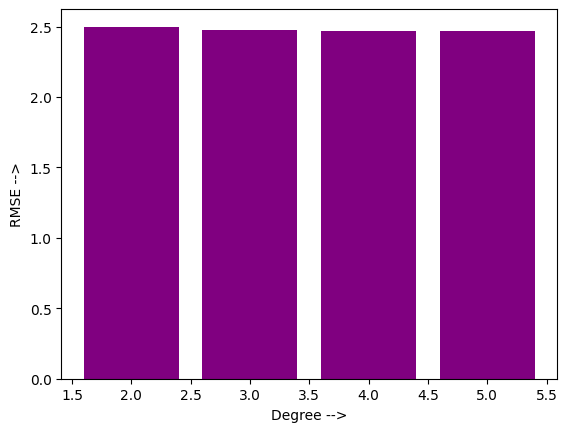

In [20]:
RMSE_poly([2,3,4,5],X_poly,y_poly,X_poly,y_poly)

Test Data

RMSE for degree 2 = 2.4337609762689443
RMSE for degree 3 = 2.410621681839802
RMSE for degree 4 = 2.4083251670642007
RMSE for degree 5 = 2.4095435183942033


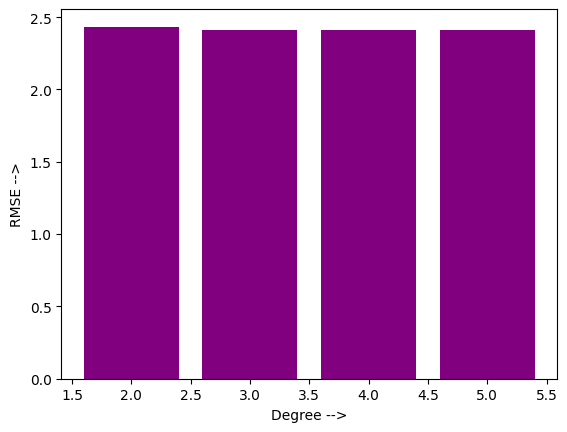

In [21]:
RMSE_poly([2,3,4,5],X_poly,y_poly,test[best_col],test['Rings'])

Best Fit Model

In [22]:
def best_model(degrees,x,y,xtest,ytest):
    RMSE_vals = []
    for i in degrees:
        poly_reg = Poly_Reg(deg=i)
        poly_reg.fit(x,y)
        ypred = poly_reg.predict(xtest)
        RMSE_vals.append(RMSE(ytest,ypred))

    best_deg = 0 
    min_rmse = 100
    print(RMSE_vals)
    print(degrees)
    for i in range(len(degrees)):
        if(RMSE_vals[i] < min_rmse):
            min_rmse = RMSE_vals[i]
            best_deg = degrees[i]

    poly_reg1 = Poly_Reg(deg=best_deg)
    poly_reg1.fit(x,y)
    ypred = poly_reg1.predict(xtest)

    plt.scatter(xtest,ytest,c='purple')
    plt.xlabel(best_col + "-->")
    plt.title(f"Best for degree = {best_deg}")
    plt.ylabel("Rings -->")
    plt.scatter(xtest,ypred,c = 'black')
    plt.show()

[np.float64(2.5278463391347246), np.float64(2.499297353079151), np.float64(2.47566923544359), np.float64(2.4671948386515967), np.float64(2.465950052620803), np.float64(2.4647416122266788), np.float64(2.4646375433914716), np.float64(2.4633941767177707), np.float64(2.4629782330165195), np.float64(2.4622985927485006), np.float64(2.4614715939039673), np.float64(2.4641104032254995), np.float64(2.4616973884235054), np.float64(2.466611960405209), np.float64(2.5237739774567154)]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


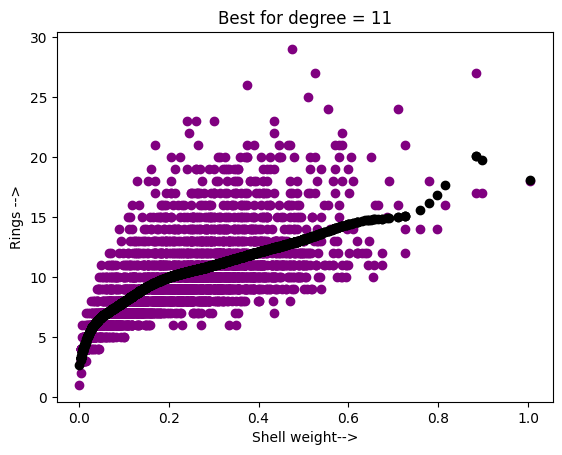

In [23]:
best_model([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],X_poly,y_poly,X_poly,y_poly)